In [42]:
import pandas as pd
import numpy as np
from sklearn import datasets

from basic_Perceptron import Perceptron

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline


In [2]:
# Loading iris data from scikit learn
iris=datasets.load_iris()
X=iris.data[:,:2]    # Only 2 columns initially for testing
y=iris.target        # Target valeues

In [3]:
clf=Perceptron()

In [4]:
clf.fit(X,y)

In [7]:
# Predicting the first data
clf.predict(X[1])

array(1)

In [8]:
# predicting all the values
y_pred=[]
for x in X:
    y_pred.append(clf.predict(x))
y_pred=np.array(y_pred)

In [9]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# Load the iris dataset
iris=sns.load_dataset('iris')
iris.head()
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [9]:
# loading the Iris data directly from UCI ML Repository
df=pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
# we'll extract sepal length and the petal length as the feature with first 100 features
# 50 for setosa(-1) and 50 for versicolor(1).

# select setosa and versicolor and labelling them as -1 and 1 respectively.
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
print(y)

# Extracting Sepal_length(0) and Petal_length(3) as features in X
X=df.iloc[:100,[0,3]].values
X.shape

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


(100, 2)

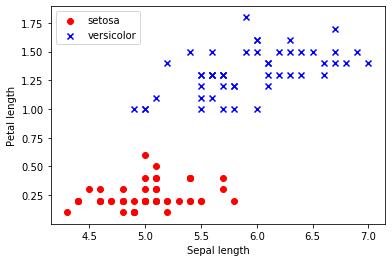

In [31]:
# We'll visualise the data via 2-D scatter plot
plt.scatter(X[:50,0],X[:50,1],
           color='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],
           color='blue',marker='x',label='versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()

Thus, we can see that a linear boundry would be sufficient to seperate the two classes(i.e. Setosa and Veriscolor) based on the two features.

In [34]:
# Time has come to put forward the Perceptron algorithm to test.
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)

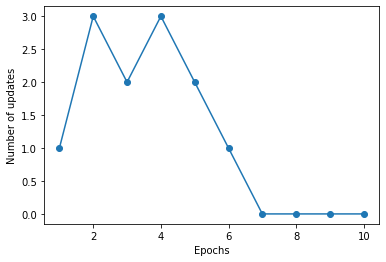

In [37]:
# Plotting the errors caused by our model for each epoch.
plt.plot(range(1,len(ppn.error_)+1),ppn.error_,
        marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Hence, we can see that the perceptron converged at seventh epoch and should be able to classify the training sample perfectly. Let's plot the small function to visualise the decision boundries for 2-D datasets.

In [72]:
x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,0.02),
                       np.arange(x2_min,x2_max,0.02))
len(np.array([xx1.ravel(),xx2.ravel()]).T)

43475

In [64]:
len(xx1[1]),xx2

(235,
 array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
        [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
        [-0.86, -0.86, -0.86, ..., -0.86, -0.86, -0.86],
        ...,
        [ 2.74,  2.74,  2.74, ...,  2.74,  2.74,  2.74],
        [ 2.76,  2.76,  2.76, ...,  2.76,  2.76,  2.76],
        [ 2.78,  2.78,  2.78, ...,  2.78,  2.78,  2.78]]))

In [71]:
xx2.shape

(185, 235)

In [74]:
for idx,cl in enumerate(np.unique(y)):
    print(X[y==cl,0])

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]


In [82]:
for idx,cl in enumerate(np.unique(y)):
    print(X[y==cl,1])

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]
[1.4 1.5 1.5 1.3 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.
 1.5 1.1 1.8 1.3 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6
 1.5 1.3 1.3 1.3 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3]


In [92]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=['s','x','o','^','v']
    colors=('red','blue','lightgreen','gray','cyan')
    # get different colors for different classes present in 'y'.
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface.
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    # We use the min and the max values of above 2 features create a pair of grid arrays 
    # xx1 and xx2 via np.meshgrid()
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    
    # Since we have trained our model of 2 featuers we need to flatten the grid arrays and
    # create a matrix that has the same number of columns as the Iris training dataset so that we can
    # use the `predict` method.
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    # Plotting the contour along with the predicted values
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot the class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where
                    y=X[y==cl,1],           # values comes out to be true
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

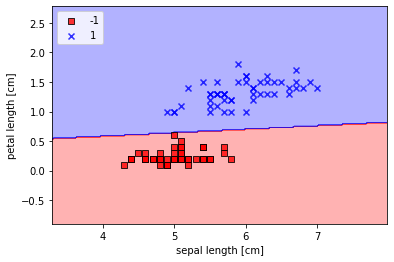

In [93]:
# Calling the above function to generate the decision boundry
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()